In [1]:
import numpy as np 
import json as json
import glob as glob
import zipfile as zipfile
import json as json
from nltk.tokenize import word_tokenize
import pandas as pd 
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import textblob
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MICE
import patsy

Using TensorFlow backend.


In [2]:
pd.set_option('display.max_colwidth', -1)

pd.set_option('display.max_rows', 1000)

In [3]:
category = pd.read_csv('categories_titles.csv',error_bad_lines=False)
clean_votes = pd.read_csv('clean_votes.csv',error_bad_lines=False)
voting_camps=pd.read_csv('voting_camps.csv',error_bad_lines=False)

In [4]:
df0=pd.merge(clean_votes,voting_camps, on=['country'])

In [5]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3368 entries, 0 to 3367
Data columns (total 5 columns):
resolut     3368 non-null object
descr       3368 non-null object
vote        3368 non-null object
descr1      3368 non-null object
category    3368 non-null object
dtypes: object(5)
memory usage: 131.6+ KB


In [6]:
data=pd.merge(category,df0, on=['resolut'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532649 entries, 0 to 532648
Data columns (total 10 columns):
resolut     532649 non-null object
descr       532649 non-null object
vote        532649 non-null object
descr1      532649 non-null object
category    532649 non-null object
voted       532649 non-null object
country     532649 non-null object
date        532649 non-null object
cluster     532649 non-null int64
camp        532649 non-null object
dtypes: int64(1), object(9)
memory usage: 44.7+ MB


In [7]:
data.head(2)

,resolut,descr,vote,descr1,category,voted,country,date,cluster,camp
0,A/RES/49/243,accreditation of nongovernmental organizations to the 4th world conference on women,"AFGHANISTAN, ALBANIA, Y ALGERIA, Y ANDORRA, ANGOLA, ANTIGUA AND BARBUDA, Y ARGENTINA, Y ARMENIA, Y AUSTRALIA, Y AUSTRIA, Y AZERBAIJAN, BAHAMAS, BAHRAIN, Y BANGLADESH, Y BARBADOS, Y BELARUS, Y BELGIUM, BELIZE, Y BENIN, Y BHUTAN, Y BOLIVIA, BOSNIA AND HERZEGOVINA, BOTSWANA, Y BRAZIL, BRUNEI DARUSSALAM, Y BULGARIA, BURKINA FASO, BURUNDI, Y CAMBODIA, CAMEROON, Y CANADA, CAPE VERDE, CENTRAL AFRICAN REPUBLIC, CHAD, Y CHILE, A CHINA, Y COLOMBIA, COMOROS, CONGO, COSTA RICA, Y COTE D'IVOIRE, CROATIA, CUBA, Y CYPRUS, CZECH REPUBLIC, DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA, Y DENMARK, DJIBOUTI, DOMINICA, DOMINICAN REPUBLIC, Y ECUADOR, EGYPT, EL SALVADOR, EQUATORIAL GUINEA, ERITREA, Y ESTONIA, ETHIOPIA, FIJI, Y FINLAND, Y FRANCE, Y GABON, GAMBIA, GEORGIA, Y GERMANY, GHANA, Y GREECE, GRENADA, GUATEMALA, GUINEA, GUINEA-BISSAU, Y GUYANA, HAITI, Y HONDURAS, Y HUNGARY, Y ICELAND, Y INDIA, INDONESIA, Y IRAN (ISLAMIC REPUBLIC OF), IRAQ, Y IRELAND, ISRAEL, Y ITALY, Y JAMAICA, Y JAPAN, JORDAN, THE REPUBLIC OF KAZAKHSTAN, Y KENYA, Y KUWAIT, KYRGYZSTAN, LAO PEOPLE'S DEMOCRATIC REPUBLIC, Y LATVIA, LEBANON, Y LESOTHO, LIBERIA, LIBYAN ARAB JAMAHIRIYA, Y LIECHTENSTEIN, Y LITHUANIA, Y LUXEMBOURG, Y MADAGASCAR, MALAWI, MALAYSIA, Y MALDIVES, MALI, Y MALTA, MARSHALL ISLANDS, MAURITANIA, MAURITIUS, Y MEXICO, MICRONESIA (FEDERATED STATES OF), Y MONACO, MONGOLIA, Y MOROCCO, MOZAMBIQUE, MYANMAR, NAMIBIA, Y NEPAL, Y NETHERLANDS, Y NEW ZEALAND, NICARAGUA, NIGER, Y NIGERIA, Y NORWAY, OMAN, Y PAKISTAN, PALAU, Y PANAMA, PAPUA NEW GUINEA, PARAGUAY, Y PERU, Y PHILIPPINES, Y POLAND, Y PORTUGAL, QATAR, REPUBLIC OF KOREA, REPUBLIC OF MOLDOVA, Y ROMANIA, Y RUSSIAN FEDERATION, RWANDA, SAINT KITTS AND NEVIS, SAINT LUCIA, SAINT VINCENT AND THE GRENADINES, SAMOA, Y SAN MARINO, SAO TOME AND PRINCIPE, SAUDI ARABIA, SENEGAL, SEYCHELLES, SIERRA LEONE, Y SINGAPORE, Y SLOVAKIA, Y SLOVENIA, SOLOMON ISLANDS, SOMALIA, Y SOUTH AFRICA, Y SPAIN, SRI LANKA, SUDAN, Y SURINAME, SWAZILAND, Y SWEDEN, SYRIAN ARAB REPUBLIC, TAJIKISTAN, Y THAILAND, Y THE FORMER YUGOSLAV REPUBLIC OF MACEDONIA, Y TOGO, TRINIDAD AND TOBAGO, Y TUNISIA, Y TURKEY, TURKMENISTAN, UGANDA, Y UKRAINE, UNITED ARAB EMIRATES, Y UNITED KINGDOM, UNITED REPUBLIC OF TANZANIA, Y UNITED STATES, Y URUGUAY, UZBEKISTAN, VANUATU, Y VENEZUELA (BOLIVARIAN REPUBLIC OF), Y VIET NAM, YEMEN, YUGOSLAVIA, DEMOCRATIC REPUBLIC OF THE CONGO, ZAMBIA, Y ZIMBABWE,Export,\n",accreditationofnongovernmentalorganizationstothe4thworldconferenceonwomen,Women,A,AFGHANISTAN,"April 21, 1995",1,DEVELOPING WORLD
1,A/RES/49/243,accreditation of nongovernmental organizations to the 4th world conference on women,"AFGHANISTAN, ALBANIA, Y ALGERIA, Y ANDORRA, ANGOLA, ANTIGUA AND BARBUDA, Y ARGENTINA, Y ARMENIA, Y AUSTRALIA, Y AUSTRIA, Y AZERBAIJAN, BAHAMAS, BAHRAIN, Y BANGLADESH, Y BARBADOS, Y BELARUS, Y BELGIUM, BELIZE, Y BENIN, Y BHUTAN, Y BOLIVIA, BOSNIA AND HERZEGOVINA, BOTSWANA, Y BRAZIL, BRUNEI DARUSSALAM, Y BULGARIA, BURKINA FASO, BURUNDI, Y CAMBODIA, CAMEROON, Y CANADA, CAPE VERDE, CENTRAL AFRICAN REPUBLIC, CHAD, Y CHILE, A CHINA, Y COLOMBIA, COMOROS, CONGO, COSTA RICA, Y COTE D'IVOIRE, CROATIA, CUBA, Y CYPRUS, CZECH REPUBLIC, DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA, Y DENMARK, DJIBOUTI, DOMINICA, DOMINICAN REPUBLIC, Y ECUADOR, EGYPT, EL SALVADOR, EQUATORIAL GUINEA, ERITREA, Y ESTONIA, ETHIOPIA, FIJI, Y FINLAND, Y FRANCE, Y GABON, GAMBIA, GEORGIA, Y GERMANY, GHANA, Y GREECE, GRENADA, GUATEMALA, GUINEA, GUINEA-BISSAU, Y GUYANA, HAITI, Y HONDURAS, Y HUNGARY, Y ICELAND, Y INDIA, INDONESIA, Y IRAN (ISLAMIC REPUBLIC OF), IRAQ, Y IRELAND, ISRAEL, Y ITALY, Y JAMAICA, Y JAPAN, JORDAN, THE REPUBLIC OF KAZAKHSTAN, Y KENYA, Y KUWAIT, KYRGYZSTAN, LAO PEOPLE'S DEMOCRATIC REPUBLIC, Y LATVIA, LEBANON, Y LESOTHO, LIBERIA, LIBYAN ARAB JAMAHIRIYA, Y LIECHTENSTEIN, Y LITHUANIA, Y LUXEMBOURG, Y MADAGASCAR, MALAWI, MA

In [7]:
def coded_voted(voted):
    for x in voted:
        if voted=='Y':
            return 1
        if voted=='N':
            return -1
        if voted =='A':
            return 0
        
data['code_vote']=data['voted'].map(coded_voted)

In [8]:
df=data.query('category == ["Middle East", "Nuclear Disarmament","Universal Human Rights","Decolonization","Racial Discrimination"]')

In [9]:
df2=df.groupby(['camp']).country.nunique().to_frame('count').T

df2.reset_index(inplace=True)

df2

camp,index,DEVELOPING WORLD,EASTERN EUROPE,ISRAEL,UNITED STATES,WESTERN EUROPE
0,count,139,14,1,1,42


In [10]:
df1=df.groupby(['category','camp'])['code_vote'].aggregate('mean').unstack()
df1.reset_index(inplace=True)
df1

camp,category,DEVELOPING WORLD,EASTERN EUROPE,ISRAEL,UNITED STATES,WESTERN EUROPE
0,Decolonization,0.965078,0.604228,-0.532609,-0.792553,0.228986
1,Middle East,0.932366,0.852537,-0.933504,-0.724712,0.603754
2,Nuclear Disarmament,0.928222,0.579754,-0.013405,-0.375989,0.326377
3,Racial Discrimination,0.970904,0.711155,-0.063492,-0.827957,0.224031
4,Universal Human Rights,0.927915,0.182113,-0.435685,-0.747934,-0.232832


In [11]:
df['country'].nunique()

197

In [12]:
#Counting disagreement between countries:

decol=(df1['DEVELOPING WORLD'][0]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][0]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][0]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][0]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][0]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

east=(df1['DEVELOPING WORLD'][1]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][1]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][1]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][1]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][1]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

disarm=(df1['DEVELOPING WORLD'][2]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][2]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][2]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][2]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][2]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

discr=(df1['DEVELOPING WORLD'][3]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][3]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][3]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][3]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][3]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

rights=(df1['DEVELOPING WORLD'][4]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][4]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][4]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][4]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][4]*df2['WESTERN EUROPE'][0])/df['country'].nunique()


# disarm=(df1['DEVELOPING WORLD'][5]*df2['DEVELOPING WORLD'][0] +\
# df1['EASTERN EUROPE'][5]*df2['EASTERN EUROPE'][0] +\
# df1['ISRAEL'][5]*df2['ISRAEL'][0] +\
# df1['UNITED STATES'][5]*df2['UNITED STATES'][0] +\
# df1['WESTERN EUROPE'][5]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

# print ("Average agreement for Geneval Protocol",geneva_protocol.round(2) )
print ("Average agreement for Decoloniation",(decol.round(2)*100),'%' )
print ("Average agreement for Middle East",east.round(2))
print ("Average agreement for Nuclear Disarm",disarm.round(2))
print ("Average agreement for Racial Discrimination",discr.round(2))
print ("Average agreement for Human Rights",rights.round(2))

Average agreement for Decoloniation 77.0 %
Average agreement for Middle East 0.84
Average agreement for Nuclear Disarm 0.76
Average agreement for Racial Discrimination 0.78
Average agreement for Human Rights 0.61


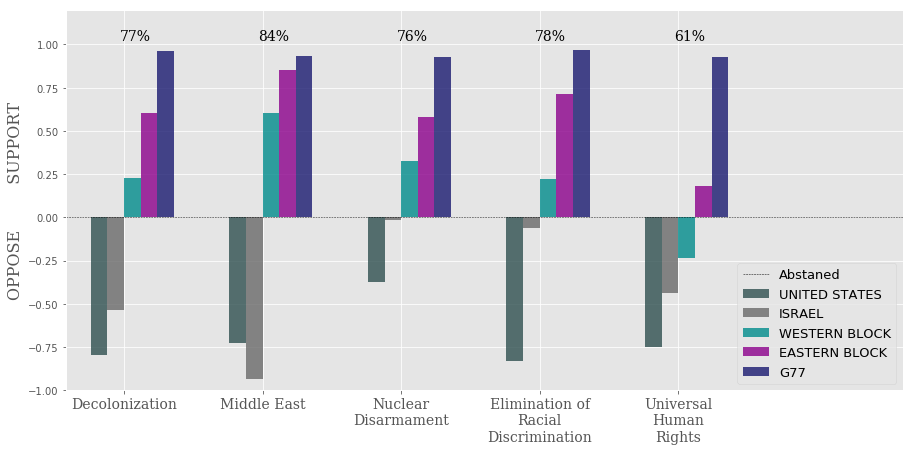

In [14]:
from matplotlib import patches

plt.style.use('ggplot')


pos = np.arange(len(df1['UNITED STATES']))
width = .12

X = np.arange(5)
#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(15,7))



plt.bar(pos,
        df1['UNITED STATES'],
        width,
        color='darkslategrey',
        label=df1['category'][0], alpha=.8)

plt.bar(pos+width,
        df1['ISRAEL'],
        width,
        color='dimgrey',
        label=df1['category'][1], alpha=.8)

plt.bar(pos+2*width,
        df1['WESTERN EUROPE'],
        width,
        color='darkcyan',
        label=df1['category'][2], alpha=.8)



plt.bar(pos+3*width,
        df1['EASTERN EUROPE'],
        width,
        color='darkmagenta',
        label=df1['category'][3], alpha=.8)

plt.bar(pos+4*width,
        df1['DEVELOPING WORLD'],
        width,
        color='midnightblue', alpha=.8)
  

ax.set_ylabel('OPPOSE         SUPPORT', fontsize=16,family="serif")
 
# # #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])

rects = ax.patches
labels=['77%','84%','76%','78%','61%']

for rect, label in zip(rects, labels):
    height = 1.01
    ax.text(rect.get_x() + rect.get_width()+.2, height, label,
            ha='center', va='bottom',size=14,family="serif")
    
ax.axhline(0,color='k',linewidth=.5,linestyle='--')

ax.set_xticklabels(['Decolonization','Middle East','Nuclear\nDisarmament',\
                    'Elimination of\nRacial\nDiscrimination',"Universal\nHuman\nRights"], size =14,family="serif")
# ax.xaxis.grid(False)
# plt.yticks(size=17)
# plt.xticks(size=18)
plt.xlim(min(pos)-2*width, max(pos)+width*15)
plt.ylim([-1,1.2])
ax.legend(['Abstaned','UNITED STATES','ISRAEL','WESTERN BLOCK','EASTERN BLOCK','G77'], loc='lower right', fontsize=13)

plt.show()

In [87]:
df=data.query('category == ["Security", "Peace","Developing Countries","Environment","Women"]')

In [88]:
df2=df.groupby(['camp']).country.nunique().to_frame('count').T

df2.reset_index(inplace=True)

df2

camp,index,DEVELOPING WORLD,EASTERN EUROPE,ISRAEL,UNITED STATES,WESTERN EUROPE
0,count,139,14,1,1,42


In [89]:
df1=df.groupby(['category','camp'])['code_vote'].aggregate('mean').unstack()
df1.reset_index(inplace=True)
df1

camp,category,DEVELOPING WORLD,EASTERN EUROPE,ISRAEL,UNITED STATES,WESTERN EUROPE
0,Developing Countries,0.970862,0.610687,-0.189189,-0.815789,0.085009
1,Environment,0.936346,0.861671,-0.333333,-0.516129,0.629929
2,Peace,0.987785,0.635266,0.314286,-0.625000,0.433416
3,Security,0.931543,0.851658,0.111111,-0.224138,0.456480
4,Women,0.975069,0.797297,0.125000,-0.428571,0.645455


In [90]:
df['country'].nunique()

197

In [91]:
#Counting disagreement between countries:

dev=(df1['DEVELOPING WORLD'][0]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][0]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][0]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][0]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][0]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

env=(df1['DEVELOPING WORLD'][1]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][1]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][1]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][1]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][1]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

peace=(df1['DEVELOPING WORLD'][2]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][2]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][2]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][2]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][2]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

sec=(df1['DEVELOPING WORLD'][3]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][3]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][3]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][3]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][3]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

women=(df1['DEVELOPING WORLD'][4]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][4]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][4]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][4]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][4]*df2['WESTERN EUROPE'][0])/df['country'].nunique()


# disarm=(df1['DEVELOPING WORLD'][5]*df2['DEVELOPING WORLD'][0] +\
# df1['EASTERN EUROPE'][5]*df2['EASTERN EUROPE'][0] +\
# df1['ISRAEL'][5]*df2['ISRAEL'][0] +\
# df1['UNITED STATES'][5]*df2['UNITED STATES'][0] +\
# df1['WESTERN EUROPE'][5]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

# print ("Average agreement for Geneval Protocol",geneva_protocol.round(2) )
print ("Average agreement for Develop Countries",(dev.round(2)*100),'%' )
print ("Average agreement for Environment",env.round(2))
print ("Average agreement for Peace",peace.round(2))
print ("Average agreement for Security",sec.round(2))
print ("Average agreement for Women",women.round(2))

Average agreement for Develop Countries 74.0 %
Average agreement for Environment 0.85
Average agreement for Peace 0.83
Average agreement for Security 0.81
Average agreement for Women 0.88


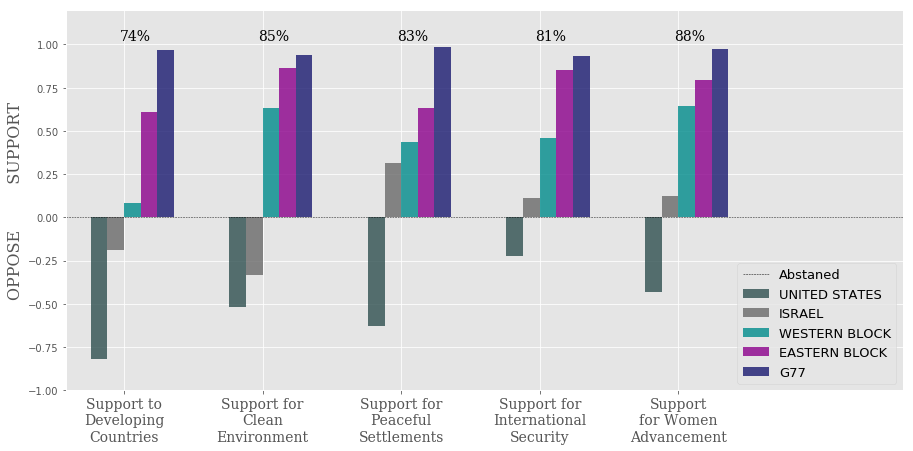

In [92]:
from matplotlib import patches

plt.style.use('ggplot')


pos = np.arange(len(df1['UNITED STATES']))
width = .12

X = np.arange(5)
#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(15,7))



plt.bar(pos,
        df1['UNITED STATES'],
        width,
        color='darkslategrey',
        label=df1['category'][0], alpha=.8)

plt.bar(pos+width,
        df1['ISRAEL'],
        width,
        color='dimgrey',
        label=df1['category'][1], alpha=.8)

plt.bar(pos+2*width,
        df1['WESTERN EUROPE'],
        width,
        color='darkcyan',
        label=df1['category'][2], alpha=.8)



plt.bar(pos+3*width,
        df1['EASTERN EUROPE'],
        width,
        color='darkmagenta',
        label=df1['category'][3], alpha=.8)

plt.bar(pos+4*width,
        df1['DEVELOPING WORLD'],
        width,
        color='midnightblue', alpha=.8)
  

ax.set_ylabel('OPPOSE         SUPPORT', fontsize=16,family="serif")
 
# # #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])

rects = ax.patches
labels=['74%','85%','83%','81%','88%']

for rect, label in zip(rects, labels):
    height = 1.01
    ax.text(rect.get_x() + rect.get_width()+.2, height, label,
            ha='center', va='bottom',size=14,family="serif")
    
ax.axhline(0,color='k',linewidth=.5,linestyle='--')

ax.set_xticklabels(['Support to\nDeveloping\nCountries','Support for\nClean\nEnvironment','Support for\nPeaceful\nSettlements',\
                    'Support for\nInternational\nSecurity',"Support\nfor Women\nAdvancement"], size =14,family="serif")
# ax.xaxis.grid(False)
# plt.yticks(size=17)
# plt.xticks(size=18)
plt.xlim(min(pos)-2*width, max(pos)+width*15)
plt.ylim([-1,1.2])
ax.legend(['Abstaned','UNITED STATES','ISRAEL','WESTERN BLOCK','EASTERN BLOCK','G77'], loc='lower right', fontsize=13)

plt.show()

In [93]:
df=data.query('category == ["Special Assistance", "Law of the sea","Children","Cooperation","Democratization"]')

In [94]:
df2=df.groupby(['camp']).country.nunique().to_frame('count').T

df2.reset_index(inplace=True)

df2

camp,index,DEVELOPING WORLD,EASTERN EUROPE,ISRAEL,UNITED STATES,WESTERN EUROPE
0,count,139,14,1,1,42


In [95]:
df1=df.groupby(['category','camp'])['code_vote'].aggregate('mean').unstack()
df1.reset_index(inplace=True)
df1

camp,category,DEVELOPING WORLD,EASTERN EUROPE,ISRAEL,UNITED STATES,WESTERN EUROPE
0,Children,0.949957,0.941176,0.777778,-0.500000,0.865385
1,Cooperation,0.946911,0.737624,-0.473684,-0.476190,0.740113
2,Democratization,0.901579,0.983784,1.000000,1.000000,0.996485
3,Law of the sea,0.958077,0.956916,0.656250,0.394737,0.858353
4,Special Assistance,0.999388,1.000000,0.909091,-0.285714,1.000000


In [96]:
df['country'].nunique()

197

In [97]:
#Counting disagreement between countries:

child=(df1['DEVELOPING WORLD'][0]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][0]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][0]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][0]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][0]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

coop=(df1['DEVELOPING WORLD'][1]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][1]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][1]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][1]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][1]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

democ=(df1['DEVELOPING WORLD'][2]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][2]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][2]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][2]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][2]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

sea=(df1['DEVELOPING WORLD'][3]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][3]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][3]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][3]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][3]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

assist=(df1['DEVELOPING WORLD'][4]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][4]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][4]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][4]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][4]*df2['WESTERN EUROPE'][0])/df['country'].nunique()


# disarm=(df1['DEVELOPING WORLD'][5]*df2['DEVELOPING WORLD'][0] +\
# df1['EASTERN EUROPE'][5]*df2['EASTERN EUROPE'][0] +\
# df1['ISRAEL'][5]*df2['ISRAEL'][0] +\
# df1['UNITED STATES'][5]*df2['UNITED STATES'][0] +\
# df1['WESTERN EUROPE'][5]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

# print ("Average agreement for Geneval Protocol",geneva_protocol.round(2) )
print ("Average agreement for Children Rights",(child.round(2)*100),'%' )
print ("Average agreement for Cooperation",coop.round(2))
print ("Average agreement for Democratization",democ.round(2))
print ("Average agreement for Law of the Sea",sea.round(2))
print ("Average agreement for Special assist",assist.round(2))

Average agreement for Children Rights 92.0 %
Average agreement for Cooperation 0.87
Average agreement for Democratization 0.93
Average agreement for Law of the Sea 0.93
Average agreement for Special assist 0.99


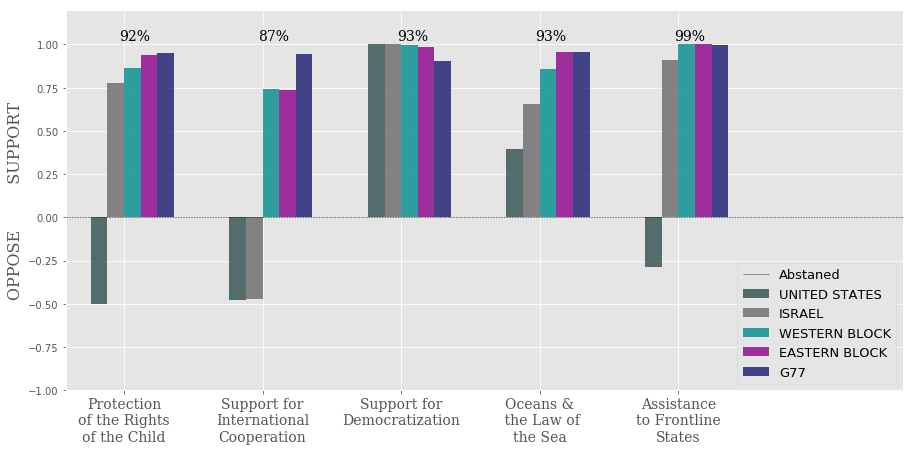

In [98]:
from matplotlib import patches

plt.style.use('ggplot')


pos = np.arange(len(df1['UNITED STATES']))
width = .12

X = np.arange(5)
#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(15,7))



plt.bar(pos,
        df1['UNITED STATES'],
        width,
        color='darkslategrey',
        label=df1['category'][0], alpha=.8)

plt.bar(pos+width,
        df1['ISRAEL'],
        width,
        color='dimgrey',
        label=df1['category'][1], alpha=.8)

plt.bar(pos+2*width,
        df1['WESTERN EUROPE'],
        width,
        color='darkcyan',
        label=df1['category'][2], alpha=.8)



plt.bar(pos+3*width,
        df1['EASTERN EUROPE'],
        width,
        color='darkmagenta',
        label=df1['category'][3], alpha=.8)

plt.bar(pos+4*width,
        df1['DEVELOPING WORLD'],
        width,
        color='midnightblue', alpha=.8)
  

ax.set_ylabel('OPPOSE         SUPPORT', fontsize=16,family="serif")
 
# # #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])

rects = ax.patches
labels=['92%','87%','93%','93%','99%']

for rect, label in zip(rects, labels):
    height = 1.01
    ax.text(rect.get_x() + rect.get_width()+.2, height, label,
            ha='center', va='bottom',size=14,family="serif")
    
ax.axhline(0,color='k',linewidth=.5,linestyle='--')

ax.set_xticklabels(['Protection\nof the Rights\nof the Child','Support for\nInternational\nCooperation',\
                    'Support for\nDemocratization',"Oceans &\n the Law of\nthe Sea",\
                    "Assistance\nto Frontline\nStates"], size =14,family="serif")
# ax.xaxis.grid(False)
# plt.yticks(size=17)
# plt.xticks(size=18)
plt.xlim(min(pos)-2*width, max(pos)+width*15)
plt.ylim([-1,1.2])
ax.legend(['Abstaned','UNITED STATES','ISRAEL','WESTERN BLOCK','EASTERN BLOCK','G77'], loc='lower right', fontsize=13)

plt.show()

In [55]:
df=data.query('category == ["Special Assistance", "Law of the sea","Children","Cooperation","Economic Order"]')

In [56]:
df2=df.groupby(['camp']).country.nunique().to_frame('count').T

df2.reset_index(inplace=True)

df2

camp,index,DEVELOPING WORLD,EASTERN EUROPE,ISRAEL,UNITED STATES,WESTERN EUROPE
0,count,139,14,1,1,42


In [57]:
df1=df.groupby(['category','camp'])['code_vote'].aggregate('mean').unstack()
df1.reset_index(inplace=True)
df1

camp,category,DEVELOPING WORLD,EASTERN EUROPE,ISRAEL,UNITED STATES,WESTERN EUROPE
0,Children,0.949957,0.941176,0.777778,-0.500000,0.865385
1,Cooperation,0.946911,0.737624,-0.473684,-0.476190,0.740113
2,Economic Order,0.985294,0.354037,-0.125000,-0.437500,-0.183258
3,Law of the sea,0.958077,0.956916,0.656250,0.394737,0.858353
4,Special Assistance,0.999388,1.000000,0.909091,-0.285714,1.000000


In [58]:
df['country'].nunique()

197

In [59]:
#Counting disagreement between countries:

child=(df1['DEVELOPING WORLD'][0]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][0]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][0]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][0]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][0]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

coop=(df1['DEVELOPING WORLD'][1]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][1]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][1]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][1]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][1]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

order=(df1['DEVELOPING WORLD'][2]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][2]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][2]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][2]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][2]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

sea=(df1['DEVELOPING WORLD'][3]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][3]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][3]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][3]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][3]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

assist=(df1['DEVELOPING WORLD'][4]*df2['DEVELOPING WORLD'][0] +\
df1['EASTERN EUROPE'][4]*df2['EASTERN EUROPE'][0] +\
df1['ISRAEL'][4]*df2['ISRAEL'][0] +\
df1['UNITED STATES'][4]*df2['UNITED STATES'][0] +\
df1['WESTERN EUROPE'][4]*df2['WESTERN EUROPE'][0])/df['country'].nunique()


# disarm=(df1['DEVELOPING WORLD'][5]*df2['DEVELOPING WORLD'][0] +\
# df1['EASTERN EUROPE'][5]*df2['EASTERN EUROPE'][0] +\
# df1['ISRAEL'][5]*df2['ISRAEL'][0] +\
# df1['UNITED STATES'][5]*df2['UNITED STATES'][0] +\
# df1['WESTERN EUROPE'][5]*df2['WESTERN EUROPE'][0])/df['country'].nunique()

# print ("Average agreement for Geneval Protocol",geneva_protocol.round(2) )
print ("Average agreement for Children Rights",(child.round(2)*100),'%' )
print ("Average agreement for Cooperation",coop.round(2))
print ("Average agreement for Order",order.round(2))
print ("Average agreement for Law of the Sea",sea.round(2))
print ("Average agreement for Special assist",assist.round(2))

Average agreement for Children Rights 92.0 %
Average agreement for Cooperation 0.87
Average agreement for Order 0.68
Average agreement for Law of the Sea 0.93
Average agreement for Special assist 0.99


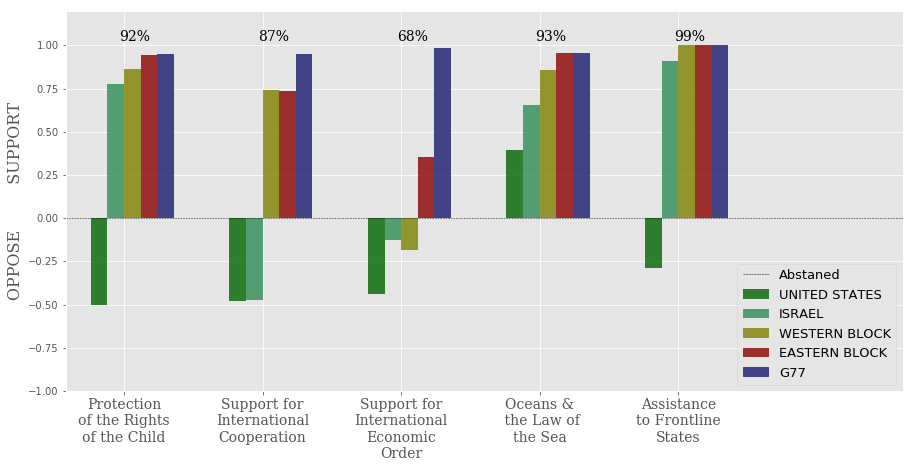

In [60]:
from matplotlib import patches

plt.style.use('ggplot')


pos = np.arange(len(df1['UNITED STATES']))
width = .12

X = np.arange(5)
#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(15,7))



plt.bar(pos,
        df1['UNITED STATES'],
        width,
        color='darkgreen',
        label=df1['category'][0], alpha=.8)

plt.bar(pos+width,
        df1['ISRAEL'],
        width,
        color='seagreen',
        label=df1['category'][1], alpha=.8)

plt.bar(pos+2*width,
        df1['WESTERN EUROPE'],
        width,
        color='olive',
        label=df1['category'][2], alpha=.8)



plt.bar(pos+3*width,
        df1['EASTERN EUROPE'],
        width,
        color='darkred',
        label=df1['category'][3], alpha=.8)

plt.bar(pos+4*width,
        df1['DEVELOPING WORLD'],
        width,
        color='midnightblue', alpha=.8)
  

ax.set_ylabel('OPPOSE         SUPPORT', fontsize=16,family="serif")
 
# # #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])

rects = ax.patches
labels=['92%','87%','68%','93%','99%']

for rect, label in zip(rects, labels):
    height = 1.01
    ax.text(rect.get_x() + rect.get_width()+.2, height, label,
            ha='center', va='bottom',size=14,family="serif")
    
ax.axhline(0,color='k',linewidth=.5,linestyle='--')

ax.set_xticklabels(['Protection\nof the Rights\nof the Child','Support for\nInternational\nCooperation',\
                    'Support for\nInternational\nEconomic\nOrder',"Oceans &\n the Law of\nthe Sea",\
                    "Assistance\nto Frontline\nStates"], size =14,family="serif")
# ax.xaxis.grid(False)
# plt.yticks(size=17)
# plt.xticks(size=18)
plt.xlim(min(pos)-2*width, max(pos)+width*15)
plt.ylim([-1,1.2])
ax.legend(['Abstaned','UNITED STATES','ISRAEL','WESTERN BLOCK','EASTERN BLOCK','G77'], loc='lower right', fontsize=13)

plt.show()

In [89]:
ax.patches

In [32]:
df=data.query('category == ["Universal Human Rights","Decolonization","Economic Order","Developing Countries","Trade and Commodities"]')

In [33]:
df1=df.groupby(['category','camp'])['code_vote'].aggregate('mean').unstack()
df1.reset_index(inplace=True)
df1

camp,category,DEVELOPING WORLD,EASTERN EUROPE,ISRAEL,UNITED STATES,WESTERN EUROPE
0,Decolonization,0.965078,0.604228,-0.532609,-0.792553,0.228986
1,Developing Countries,0.970862,0.610687,-0.189189,-0.815789,0.085009
2,Economic Order,0.985294,0.354037,-0.125000,-0.437500,-0.183258
3,Trade and Commodities,0.862725,0.670103,0.000000,-0.280000,0.523810
4,Universal Human Rights,0.927915,0.182113,-0.435685,-0.747934,-0.232832


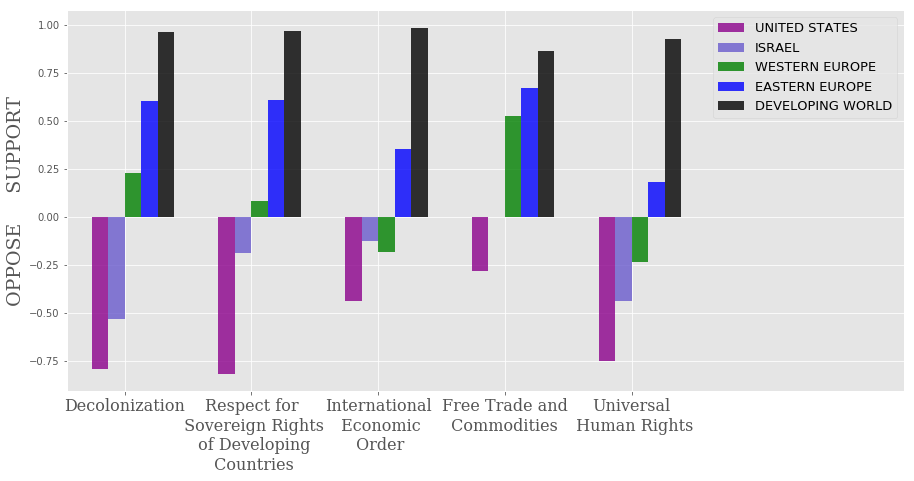

In [34]:
plt.style.use('ggplot')


pos = np.arange(len(df1['UNITED STATES']))
width = .13

X = np.arange(5)
#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(15,7))

plt.bar(pos,
        df1['UNITED STATES'],
        width,
        color='darkmagenta',
        label=df1['category'][0], alpha=.8)

plt.bar(pos+width,
        df1['ISRAEL'],
        width,
        color='slateblue',
        label=df1['category'][1], alpha=.8)

plt.bar(pos+2*width,
        df1['WESTERN EUROPE'],
        width,
        color='green',
        label=df1['category'][2], alpha=.8)

plt.bar(pos+3*width,
        df1['EASTERN EUROPE'],
        width,
        color='blue',
        label=df1['category'][3], alpha=.8)

plt.bar(pos+4*width,
        df1['DEVELOPING WORLD'],
        width,
        color='k',
        label=df1['category'][4], alpha=.8)
  

ax.set_ylabel('OPPOSE     SUPPORT', fontsize=19,family="serif")
 
# # #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])


ax.set_ylabel('OPPOSE     SUPPORT', fontsize=19,family="serif")
 
# #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])



ax.set_xticklabels(['Decolonization','Respect for\n Sovereign Rights\n of Developing\n Countries',\
                    'International\n Economic\n Order',\
                    'Free Trade and\n Commodities ','Universal\n Human Rights'], size =16,family="serif")
# ax.xaxis.grid(False)
# plt.yticks(size=17)
# plt.xticks(size=18)
plt.xlim(min(pos)-2*width, max(pos)+width*18)
# plt.ylim([min(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS']), max(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS'])] )


plt.legend(['UNITED STATES','ISRAEL','WESTERN EUROPE','EASTERN EUROPE','DEVELOPING WORLD'], loc='upper right', fontsize=13)

plt.show()

In [35]:
df=data.query('category == ["Racial Discrimination","Women","Children","Peace","Environment"]')

In [36]:
df1=df.groupby(['category','camp'])['code_vote'].aggregate('mean').unstack()
df1.reset_index(inplace=True)
df1

camp,category,DEVELOPING WORLD,EASTERN EUROPE,ISRAEL,UNITED STATES,WESTERN EUROPE
0,Children,0.949957,0.941176,0.777778,-0.500000,0.865385
1,Environment,0.936346,0.861671,-0.333333,-0.516129,0.629929
2,Peace,0.987785,0.635266,0.314286,-0.625000,0.433416
3,Racial Discrimination,0.970904,0.711155,-0.063492,-0.827957,0.224031
4,Women,0.975069,0.797297,0.125000,-0.428571,0.645455


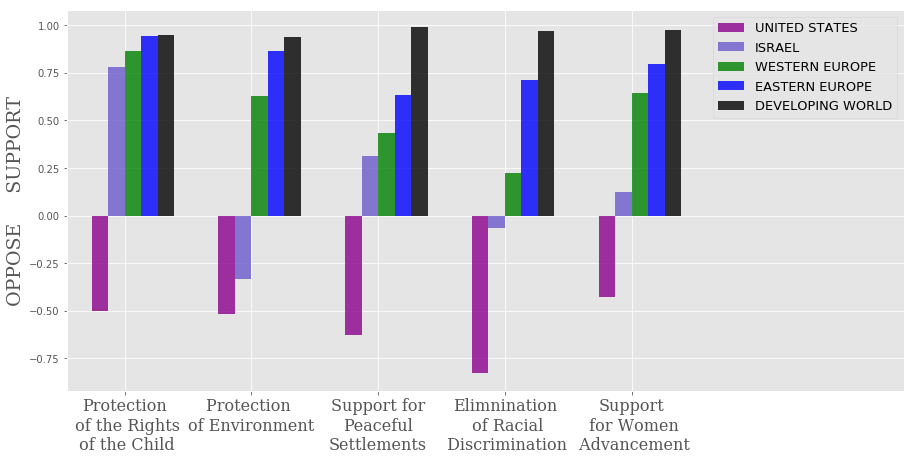

In [37]:
plt.style.use('ggplot')


pos = np.arange(len(df1['UNITED STATES']))
width = .13

X = np.arange(5)
#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(15,7))

plt.bar(pos,
        df1['UNITED STATES'],
        width,
        color='darkmagenta',
        label=df1['category'][0], alpha=.8)

plt.bar(pos+width,
        df1['ISRAEL'],
        width,
        color='slateblue',
        label=df1['category'][1], alpha=.8)

plt.bar(pos+2*width,
        df1['WESTERN EUROPE'],
        width,
        color='green',
        label=df1['category'][2], alpha=.8)

plt.bar(pos+3*width,
        df1['EASTERN EUROPE'],
        width,
        color='blue',
        label=df1['category'][3], alpha=.8)

plt.bar(pos+4*width,
        df1['DEVELOPING WORLD'],
        width,
        color='k', alpha=.8)
  


# # #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])


ax.set_ylabel('OPPOSE     SUPPORT', fontsize=19,family="serif")
 
# #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])
ax.set_ylabel('OPPOSE     SUPPORT', fontsize=19,family="serif")
 
# #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])



ax.set_xticklabels(['Protection\n of the Rights\n of the Child','Protection \nof Environment',\
                    'Support for\nPeaceful\nSettlements',\
                    'Elimnination\n of Racial\n Discrimination','Support\n for Women\n Advancement'], size =16,family="serif")
# ax.xaxis.grid(False)
# plt.yticks(size=17)
# plt.xticks(size=18)
plt.xlim(min(pos)-2*width, max(pos)+width*18)
# plt.ylim([min(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS']), max(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS'])] )

plt.legend(['UNITED STATES','ISRAEL','WESTERN EUROPE','EASTERN EUROPE','DEVELOPING WORLD'], loc='upper right', fontsize=13)

plt.show()

In [40]:
df=data.query('category == ["Arbitrary Executions","Democratization","International Order","Georgian Refugees","Assistance to Refugees"]')

In [41]:
df1=df.groupby(['category','camp'])['code_vote'].aggregate('mean').unstack()
df1.reset_index(inplace=True)
df1

camp,category,DEVELOPING WORLD,EASTERN EUROPE,ISRAEL,UNITED STATES,WESTERN EUROPE
0,Arbitrary Executions,0.597428,0.910891,0.125000,0.500000,0.964856
1,Assistance to Refugees,0.883436,0.034483,0.666667,0.333333,0.888889
2,Democratization,0.901579,0.983784,1.000000,1.000000,0.996485
3,Georgian Refugees,0.061929,0.388430,0.000000,1.000000,0.858268
4,International Order,0.918975,-0.523810,-1.000000,-1.000000,-0.996516


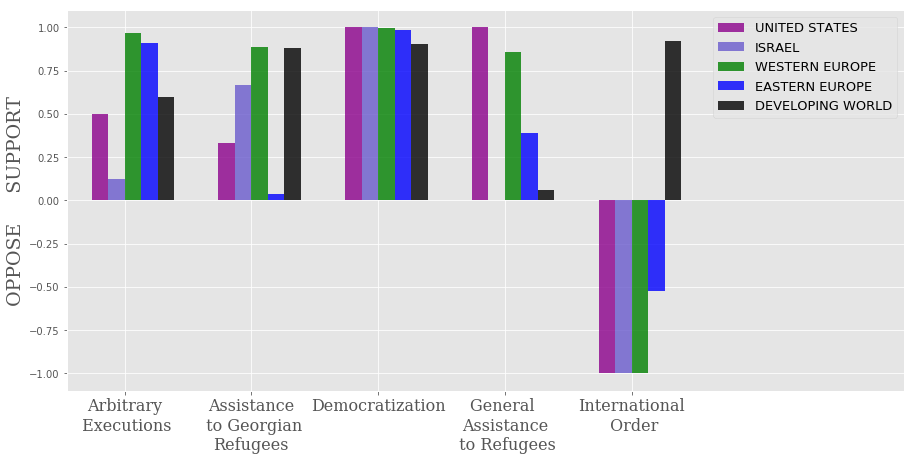

In [42]:
plt.style.use('ggplot')


pos = np.arange(len(df1['UNITED STATES']))
width = .13

X = np.arange(5)
#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(15,7))

plt.bar(pos,
        df1['UNITED STATES'],
        width,
        color='darkmagenta',
        label=df1['category'][0], alpha=.8)

plt.bar(pos+width,
        df1['ISRAEL'],
        width,
        color='slateblue',
        label=df1['category'][1], alpha=.8)

plt.bar(pos+2*width,
        df1['WESTERN EUROPE'],
        width,
        color='green',
        label=df1['category'][2], alpha=.8)

plt.bar(pos+3*width,
        df1['EASTERN EUROPE'],
        width,
        color='blue',
        label=df1['category'][3], alpha=.8)

plt.bar(pos+4*width,
        df1['DEVELOPING WORLD'],
        width,
        color='k', alpha=.8)

ax.set_ylabel('OPPOSE     SUPPORT', fontsize=19,family="serif")
 
# #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])



ax.set_xticklabels(['Arbitrary\n Executions','Assistance\n to Georgian\nRefugees',\
                    'Democratization',\
                    'General \nAssistance\n to Refugees','International\n Order'], size =16,family="serif")
# ax.xaxis.grid(False)
# plt.yticks(size=17)
# plt.xticks(size=18)
plt.xlim(min(pos)-2*width, max(pos)+width*18)
# plt.ylim([min(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS']), max(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS'])] )

plt.legend(['UNITED STATES','ISRAEL','WESTERN EUROPE','EASTERN EUROPE','DEVELOPING WORLD'], loc='upper right', fontsize=13)

plt.show()

In [71]:
df=data.query('category == ["Cooperation","International Matters","World Social Situation","Death Penalty","Special Assistance"]')

In [72]:
df1=df.groupby(['category','camp'])['code_vote'].aggregate('mean').unstack()
df1.reset_index(inplace=True)
df1

camp,category,DEVELOPING WORLD,EASTERN EUROPE,ISRAEL,UNITED STATES,WESTERN EUROPE
0,Cooperation,0.946911,0.737624,-0.473684,-0.476190,0.740113
1,Death Penalty,0.142303,0.923077,1.000000,-1.000000,0.923729
2,International Matters,0.971044,1.000000,-0.666667,-0.888889,-0.343434
3,Special Assistance,0.999388,1.000000,0.909091,-0.285714,1.000000
4,World Social Situation,0.995745,1.000000,0.000000,-1.000000,0.473684


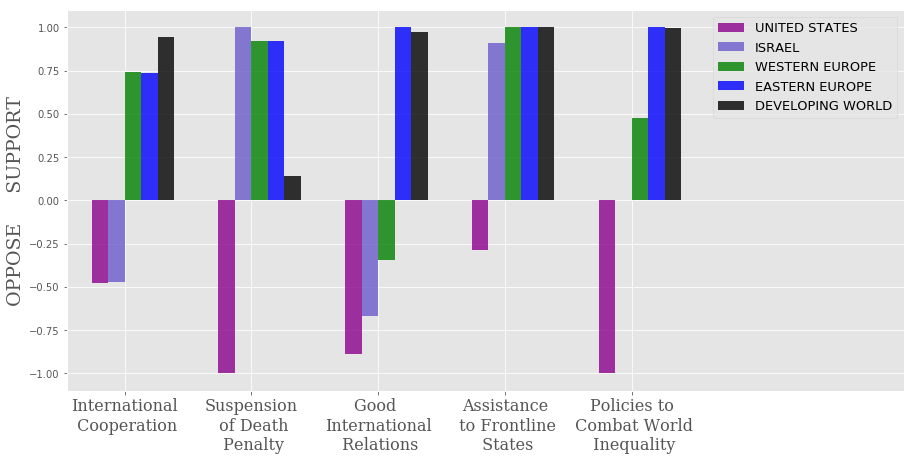

In [75]:
plt.style.use('ggplot')


pos = np.arange(len(df1['UNITED STATES']))
width = .13

X = np.arange(5)
#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(15,7))

plt.bar(pos,
        df1['UNITED STATES'],
        width,
        color='darkmagenta',
        label=df1['category'][0], alpha=.8)

plt.bar(pos+width,
        df1['ISRAEL'],
        width,
        color='slateblue',
        label=df1['category'][1], alpha=.8)

plt.bar(pos+2*width,
        df1['WESTERN EUROPE'],
        width,
        color='green',
        label=df1['category'][2], alpha=.8)

plt.bar(pos+3*width,
        df1['EASTERN EUROPE'],
        width,
        color='blue',
        label=df1['category'][3], alpha=.8)

plt.bar(pos+4*width,
        df1['DEVELOPING WORLD'],
        width,
        color='k',
        label=df1['category'][4], alpha=.8)

ax.set_ylabel('OPPOSE     SUPPORT', fontsize=19,family="serif")
 
# #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])



ax.set_xticklabels(['International\n Cooperation','Suspension\n of Death\n Penalty',\
                    'Good \nInternational\n Relations',\
                    'Assistance\n to Frontline\n States','Policies to\n Combat World\n Inequality'], size =16,family="serif")
# ax.xaxis.grid(False)
# plt.yticks(size=17)
# plt.xticks(size=18)
plt.xlim(min(pos)-2*width, max(pos)+width*18)
# plt.ylim([min(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS']), max(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS'])] )

plt.legend(['UNITED STATES','ISRAEL','WESTERN EUROPE','EASTERN EUROPE','DEVELOPING WORLD'], loc='upper right', fontsize=13)

plt.show()

In [79]:
df=data.query('category == ["Funding","Security","UN Strengthening","Relations with Host Country","UN and Arab States"]')

In [77]:
df1=df.groupby(['category','camp'])['code_vote'].aggregate('mean').unstack()
df1.reset_index(inplace=True)
df1

camp,category,DEVELOPING WORLD,EASTERN EUROPE,ISRAEL,UNITED STATES,WESTERN EUROPE
0,Funding,0.926166,-0.014245,0.075758,-0.260274,0.566458
1,Relations with Host Country,1.000000,1.000000,-1.000000,-1.000000,0.986928
2,Security,0.931543,0.851658,0.111111,-0.224138,0.456480
3,UN Strengthening,0.959064,0.363636,0.750000,0.375000,0.935323
4,UN and Arab States,0.934959,0.824324,-1.000000,-1.000000,-0.232432


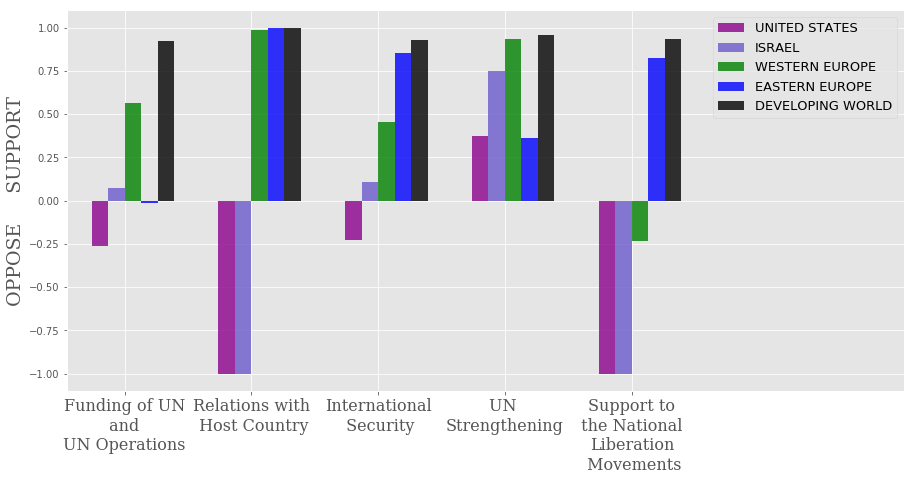

In [78]:
plt.style.use('ggplot')


pos = np.arange(len(df1['UNITED STATES']))
width = .13

X = np.arange(5)
#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(15,7))

plt.bar(pos,
        df1['UNITED STATES'],
        width,
        color='darkmagenta',
        label=df1['category'][0], alpha=.8)

plt.bar(pos+width,
        df1['ISRAEL'],
        width,
        color='slateblue',
        label=df1['category'][1], alpha=.8)

plt.bar(pos+2*width,
        df1['WESTERN EUROPE'],
        width,
        color='green',
        label=df1['category'][2], alpha=.8)

plt.bar(pos+3*width,
        df1['EASTERN EUROPE'],
        width,
        color='blue',
        label=df1['category'][3], alpha=.8)

plt.bar(pos+4*width,
        df1['DEVELOPING WORLD'],
        width,
        color='k',
        label=df1['category'][4], alpha=.8)

ax.set_ylabel('OPPOSE     SUPPORT', fontsize=19,family="serif")
 
# #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])



ax.set_xticklabels(['Funding of UN\n and \nUN Operations','Relations with\n Host Country',\
                    'International\n Security', 'UN \nStrengthening',\
                    'Support to\n the National \nLiberation\n Movements'], size =16,family="serif")
# ax.xaxis.grid(False)
# plt.yticks(size=17)
# plt.xticks(size=18)
plt.xlim(min(pos)-2*width, max(pos)+width*18)
# plt.ylim([min(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS']), max(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS'])] )

plt.legend(['UNITED STATES','ISRAEL','WESTERN EUROPE','EASTERN EUROPE','DEVELOPING WORLD'], loc='upper right', fontsize=13)

plt.show()

In [80]:
df=data.query('category == ["Religion","Arms Treaty","Admin","Science and Technology",\
"Reduction of Military Resources","Objective Infomation on Military Capabilities"]')

In [219]:
df1=df.groupby(['category','camp'])['code_vote'].aggregate('mean').unstack()
df1.reset_index(inplace=True)
df1

cluster1,category,EAST & OTHERS,ISRAEL,UNITED STATES,WEST
0,Admin,0.883357,0.500,0.000000,0.648649
1,Arms Treaty,0.866928,0.800,0.600000,1.000000
2,Objective Infomation on Military Capabilities,0.849722,1.000,1.000000,0.910448
3,Reduction of Military Resources,0.855228,0.500,0.571429,0.726316
4,Religion,0.730769,-0.625,-0.500000,-0.411765
5,Science and Technology,0.927935,-0.020,-0.296296,0.145553


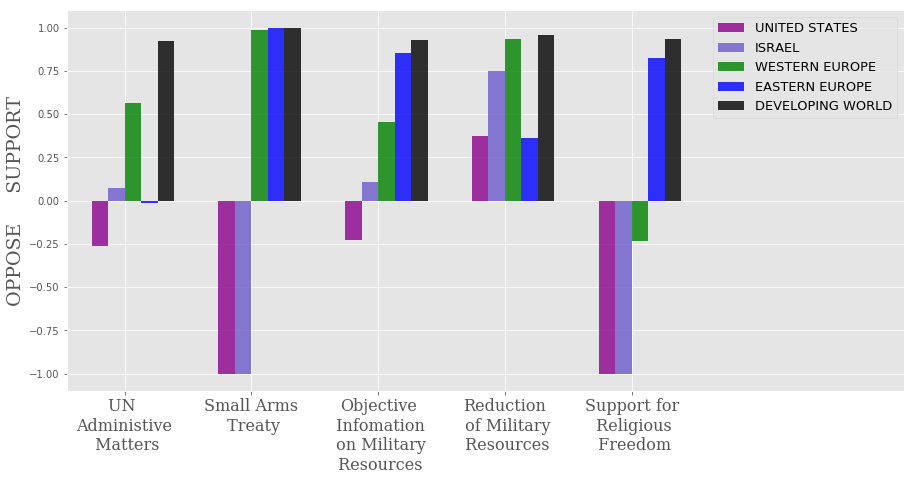

In [81]:
plt.style.use('ggplot')


pos = np.arange(len(df1['UNITED STATES']))
width = .13

X = np.arange(5)
#fig, ax = plt.subplots(figsize=(13,7),facecolor='lightgray')

fig, ax = plt.subplots(figsize=(15,7))

plt.bar(pos,
        df1['UNITED STATES'],
        width,
        color='darkmagenta',
        label=df1['category'][0], alpha=.8)

plt.bar(pos+width,
        df1['ISRAEL'],
        width,
        color='slateblue',
        label=df1['category'][1], alpha=.8)

plt.bar(pos+2*width,
        df1['WESTERN EUROPE'],
        width,
        color='green',
        label=df1['category'][2], alpha=.8)

plt.bar(pos+3*width,
        df1['EASTERN EUROPE'],
        width,
        color='blue',
        label=df1['category'][3], alpha=.8)

plt.bar(pos+4*width,
        df1['DEVELOPING WORLD'],
        width,
        color='k',
        label=df1['category'][4], alpha=.8)

ax.set_ylabel('OPPOSE     SUPPORT', fontsize=19,family="serif")
 
# #ax.patch.set_facecolor('lightgray')
# plt.grid(color='gray', linestyle='--', alpha=.5)

# ax.set_title('Bar Chart of Most Valued Traits in Opposite Sex',y=1.03)

ax.set_xticks([p + 1.5*width for p in pos])



ax.set_xticklabels(['UN \nAdministive\n Matters','Small Arms\n Treaty','Objective\n Infomation\n on Military\n Resources',\
                    'Reduction\n of Military\n Resources',\
                    'Support for\n Religious\n Freedom','Use of\n Science and\n Technology for\n International\n Peace'], size =16,family="serif")
# ax.xaxis.grid(False)
# plt.yticks(size=17)
# plt.xticks(size=18)
plt.xlim(min(pos)-2*width, max(pos)+width*18)
# plt.ylim([min(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS']), max(df1['UNITED STATES'] + df1['ISRAEL']+df1['WEST']+df1['EAST & OTHERS'])] )

plt.legend(['UNITED STATES','ISRAEL','WESTERN EUROPE','EASTERN EUROPE','DEVELOPING WORLD'], loc='upper right', fontsize=13)

plt.show()

In [214]:
df3=category[category['category']=='UN and Arab States']

In [215]:
df3

,resolut,descr,vote,descr1,category
1139,A/RES/47/29,observer status of national liberation movements recognized by the organization of african unity andor by the league of arab states,"Y AFGHANISTAN, ALBANIA, Y ALGERIA, Y ANGOLA, Y ANTIGUA AND BARBUDA, A ARGENTINA, Y ARMENIA, A AUSTRALIA, A AUSTRIA, A AZERBAIJAN, Y BAHAMAS, Y BAHRAIN, BANGLADESH, Y BARBADOS, BELARUS, N BELGIUM, Y BELIZE, Y BENIN, BHUTAN, Y BOLIVIA, BOSNIA AND HERZEGOVINA, Y BOTSWANA, Y BRAZIL, Y BRUNEI DARUSSALAM, A BULGARIA, Y BURKINA FASO, BURUNDI, CAMBODIA, Y CAMEROON, A CANADA, CAPE VERDE, Y CENTRAL AFRICAN REPUBLIC, Y CHAD, Y CHILE, Y CHINA, Y COLOMBIA, COMOROS, Y CONGO, A COSTA RICA, Y COTE D'IVOIRE, CROATIA, Y CUBA, Y CYPRUS, A CZECHOSLOVAKIA, Y DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA, A DENMARK, Y DJIBOUTI, DOMINICA, DOMINICAN REPUBLIC, Y ECUADOR, Y EGYPT, Y EL SALVADOR, EQUATORIAL GUINEA, A ESTONIA, Y ETHIOPIA, FIJI, A FINLAND, N FRANCE, Y GABON, Y GAMBIA, GEORGIA, N GERMANY, Y GHANA, A GREECE, Y GRENADA, Y GUATEMALA, Y GUINEA, Y GUINEA-BISSAU, GUYANA, Y HAITI, Y HONDURAS, A HUNGARY, A ICELAND, Y INDIA, Y INDONESIA, Y IRAN (ISLAMIC REPUBLIC OF), Y IRAQ, A IRELAND, N ISRAEL, N ITALY, JAMAICA, A JAPAN, Y JORDAN, THE REPUBLIC OF KAZAKHSTAN, Y KENYA, Y KUWAIT, KYRGYZSTAN, LAO PEOPLE'S DEMOCRATIC REPUBLIC, A LATVIA, Y LEBANON, Y LESOTHO, Y LIBERIA, Y LIBYAN ARAB JAMAHIRIYA, A LIECHTENSTEIN, A LITHUANIA, N LUXEMBOURG, Y MADAGASCAR, Y MALAWI, Y MALAYSIA, Y MALDIVES, Y MALI, A MALTA, A MARSHALL ISLANDS, Y MAURITANIA, MAURITIUS, Y MEXICO, A MICRONESIA (FEDERATED STATES OF), MONGOLIA, Y MOROCCO, Y MOZAMBIQUE, Y MYANMAR, Y NAMIBIA, Y NEPAL, N NETHERLANDS, A NEW ZEALAND, Y NICARAGUA, Y NIGER, Y NIGERIA, A NORWAY, Y OMAN, Y PAKISTAN, Y PANAMA, Y PAPUA NEW GUINEA, Y PARAGUAY, Y PERU, Y PHILIPPINES, A POLAND, A PORTUGAL, Y QATAR, A REPUBLIC OF KOREA, REPUBLIC OF MOLDOVA, A ROMANIA, A RUSSIAN FEDERATION, Y RWANDA, SAINT KITTS AND NEVIS, SAINT LUCIA, Y SAINT VINCENT AND THE GRENADINES, SAMOA, A SAN MARINO, Y SAO TOME AND PRINCIPE, Y SAUDI ARABIA, Y SENEGAL, Y SEYCHELLES, Y SIERRA LEONE, Y SINGAPORE, SLOVENIA, SOLOMON ISLANDS, SOMALIA, SOUTH AFRICA, A SPAIN, Y SRI LANKA, Y SUDAN, Y SURINAME, Y SWAZILAND, A SWEDEN, Y SYRIAN ARAB REPUBLIC, TAJIKISTAN, Y THAILAND, Y TOGO, Y TRINIDAD AND TOBAGO, Y TUNISIA, A TURKEY, TURKMENISTAN, Y UGANDA, A UKRAINE, Y UNITED ARAB EMIRATES, N UNITED KINGDOM, Y UNITED REPUBLIC OF TANZANIA, N UNITED STATES, Y URUGUAY, UZBEKISTAN, VANUATU, Y VENEZUELA (BOLIVARIAN REPUBLIC OF), Y VIET NAM, Y YEMEN, YUGOSLAVIA, DEMOCRATIC REPUBLIC OF THE CONGO, Y ZAMBIA, Y ZIMBABWE,Export,\n",observerstatusofnationalliberationmovementsrecognizedbytheorganizationofafricanunityandorbytheleagueofarabstates,UN and Arab States
1526,A/RES/45/37,observer status of national liberation movements recognized by the organization of african unity andor by the league of arab states,"Y AFGHANISTAN, Y ALBANIA, Y ALGERIA, Y ANGOLA, Y ANTIGUA AND BARBUDA, Y ARGENTINA, A AUSTRALIA, A AUSTRIA, Y BAHAMAS, Y BAHRAIN, Y BANGLADESH, Y BARBADOS, N BELGIUM, Y BELIZE, Y BENIN, Y BHUTAN, Y BOLIVIA, Y BOTSWANA, Y BRAZIL, Y BRUNEI DARUSSALAM, A BULGARIA, Y BURKINA FASO, Y BURUNDI, Y BELARUS, CAMBODIA, Y CAMEROON, A CANADA, Y CAPE VERDE, Y CENTRAL AFRICAN REPUBLIC, Y CHAD, Y CHILE, Y CHINA, Y COLOMBIA, Y COMOROS, Y CONGO, A COSTA RICA, Y COTE D'IVOIRE, Y CUBA, Y CYPRUS, A CZECHOSLOVAKIA, A DENMARK, Y DJIBOUTI, A DOMINICA, Y DOMINICAN REPUBLIC, Y ECUADOR, Y EGYPT, A EL SALVADOR, EQUATORIAL GUINEA, Y ETHIOPIA, Y FIJI, A FINLAND, N FRANCE, Y GABON, Y GAMBIA, N GERMANY, Y GHANA, A GREECE, Y GRENADA, Y GUATEMALA, Y GUINEA, Y GUINEA-BISSAU, Y GUYANA, Y HAITI, A HONDURAS, A HUNGARY, A ICELAND, Y INDIA, Y INDONESIA, Y IRAN (ISLAMIC REPUBLIC OF), Y IRAQ, A IRELAND, N ISRAEL, N ITALY, Y JAMAICA, A JAPAN, Y JORDAN, Y KENYA, Y KUWAIT, Y LAO PEOPLE'S DEMOCRATIC REPUBLIC, Y LEBANON, Y LESOTHO, LIBERIA, Y LIBYAN ARAB JAMAHIRIYA, A LIECHTENSTEIN, N LUXEMBOURG, Y MADAGASCAR, Y MALAWI, Y MALAYSIA, Y MALDIVES, 

In [182]:
https://stackoverflow.com/questions/25793731/matplotlib-how-to-get-space-between-bars

array([1, 2, 3, 4, 5])